机器学习中，线性模型需要用到非线性数据时，需要对非线性数据进行分箱。

In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

### 1. 绘制散点图函数plt.scatter

In [5]:
x1 = np.random.randn(10)
x2 = x1 + x1 ** 2 - 10

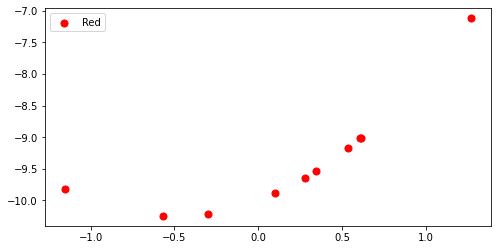

In [8]:
# 确定画布，比例为8:4
plt.figure(figsize=(8,4))

plt.scatter(x1,x2,s=50,c='red',label='Red')
plt.legend()
plt.show()

### 2.散点图多个颜色与图例

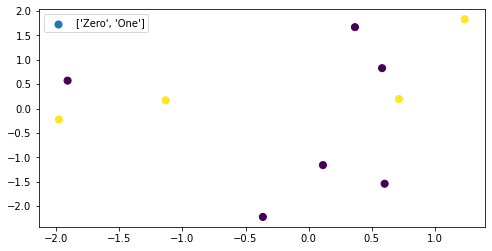

In [9]:
X = np.random.randn(10,2)
y = np.array([0,0,1,1,0,1,0,1,0,0])

plt.figure(figsize=(8,4))

plt.scatter(X[:,0], X[:,1]
            ,s=50
            ,c=y
            ,label = ['Zero', 'One']
            )
plt.legend()
plt.show()

#### 【核心知识点】可视化分类标签时的图例

如果我们希望显示多种颜色的散点图，并且这个颜色是我们的标签y所代表的分类，那我们**无法**让散点图显示分别代表不同颜色的图例<br>

解决方法：在同一个画布上循环画图，指定不同的图例

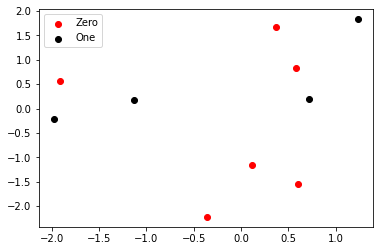

In [11]:
colors = ['red', 'black']
labels = ['Zero', 'One']

for i in range(X.shape[1]):
    plt.scatter(X[y == i, 0]    # 这里的y是标签，用布尔值的方式取数
                ,X[y == i, 1]
                ,c = colors[i]
                ,label = labels[i]
                )

plt.legend()
plt.show()

#### 总结一下：
画散点图需要找到三个元素：

1. 数据x1和x2<br>
2. 标签的列表<br>
3. 颜色列表


### 3. 认识下绘图用到的数据

In [2]:
#导入提供的数据
midwest = pd.read_csv("data/midwest_filter.csv")

In [25]:
midwest.shape

(332, 29)

In [26]:
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


In [27]:
midwest.columns

Index(['PID', 'county', 'state', 'area', 'poptotal', 'popdensity', 'popwhite',
       'popblack', 'popamerindian', 'popasian', 'popother', 'percwhite',
       'percblack', 'percamerindan', 'percasian', 'percother', 'popadults',
       'perchsd', 'percollege', 'percprof', 'poppovertyknown',
       'percpovertyknown', 'percbelowpoverty', 'percchildbelowpovert',
       'percadultpoverty', 'percelderlypoverty', 'inmetro', 'category',
       'dot_size'],
      dtype='object')

In [28]:
#给大家翻译了一下：
["城市ID","郡","州","面积","总人口","人口密度","白人人口","非裔人口","美洲印第安人人口","亚洲人口","其他人种人口"
,"白人所占比例","非裔所占比例","美洲印第安人所占比例","亚洲人所占比例","其他人种比例"
,"成年人口","具有高中文凭的比率","大学文凭比例","有工作的人群比例"
,"已知贫困人口","已知贫困人口的比例","贫困线以下的人的比例","贫困线以下的儿童所占比例","贫困的成年人所占的比例","贫困的老年人所占的比例"
,"是否拥有地铁","标签","点的尺寸"]

['城市ID',
 '郡',
 '州',
 '面积',
 '总人口',
 '人口密度',
 '白人人口',
 '非裔人口',
 '美洲印第安人人口',
 '亚洲人口',
 '其他人种人口',
 '白人所占比例',
 '非裔所占比例',
 '美洲印第安人所占比例',
 '亚洲人所占比例',
 '其他人种比例',
 '成年人口',
 '具有高中文凭的比率',
 '大学文凭比例',
 '有工作的人群比例',
 '已知贫困人口',
 '已知贫困人口的比例',
 '贫困线以下的人的比例',
 '贫困线以下的儿童所占比例',
 '贫困的成年人所占的比例',
 '贫困的老年人所占的比例',
 '是否拥有地铁',
 '标签',
 '点的尺寸']

### 4. 准备标签列表和颜色列表

#### 标签

In [3]:
# midwest['category'].unqiue() 'Series' object has no attribute 'unqiue'

categories = np.unique(midwest['category'])

In [4]:
categories

array(['AAR', 'AAU', 'AHR', 'ALR', 'ALU', 'HAR', 'HAU', 'HHR', 'HLR',
       'HLU', 'LAR', 'LAU', 'LHR', 'LHU'], dtype=object)

#### 颜色

面对有特别多颜色的需求时，可以使用matplotlib自带的方法来自动生成颜色<br>
众多光谱可以参考：https://matplotlib.org/tutorials/colors/colormaps.html<br>
其中，最常用的是`plt.cm.tab10()`，在其中输入任意浮点数，就能提取出一种颜色出来<br>
光谱tab10中总共只有十种颜色，如果输入的浮点数比较接近，会返回类似的颜色<br>
这种颜色会以元祖的形式返回，表示为四个浮点数组成的RGBA色彩空间或者三个浮点数组成的RGB色彩空间中的随机色彩<br>
A指透明度，这个方法给出的颜色透明度都为1


In [33]:
color1 = plt.cm.tab10(5.2)

In [34]:
color1

(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


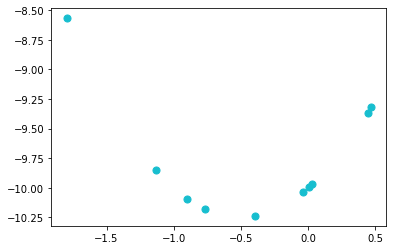

In [35]:
x1 = np.random.randn(10)
x2 = x1 + x1 ** 2 - 10
plt.scatter(x1,x2,s=50,c=color1)
plt.show()

> *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.

这里的警告大概意思是，颜色的值最好是二维数组，如果是一维数组，搞不清楚是指用一个颜色还是多个颜色

In [38]:
# reshape：增维，输入(1,-1)是让行上的维度为1，(-1,1)是让列上的维度为1
np.array(color1).reshape(1,-1)

array([[0.09019608, 0.74509804, 0.81176471, 1.        ]])

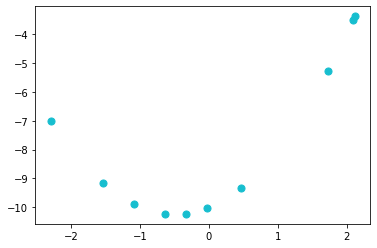

In [39]:
x1 = np.random.randn(10)
x2 = x1 + x1 ** 2 - 10
plt.scatter(x1,x2,s=50,c=np.array(color1).reshape(1,-1))
plt.show()

### 5.生成基础的图像

In [5]:
# 取选定类别的指定列
midwest.loc[midwest['category'] == categories[0], 'poptotal'].head()

0    66090
2    14991
4     5836
5    35688
7    16805
Name: poptotal, dtype: int64

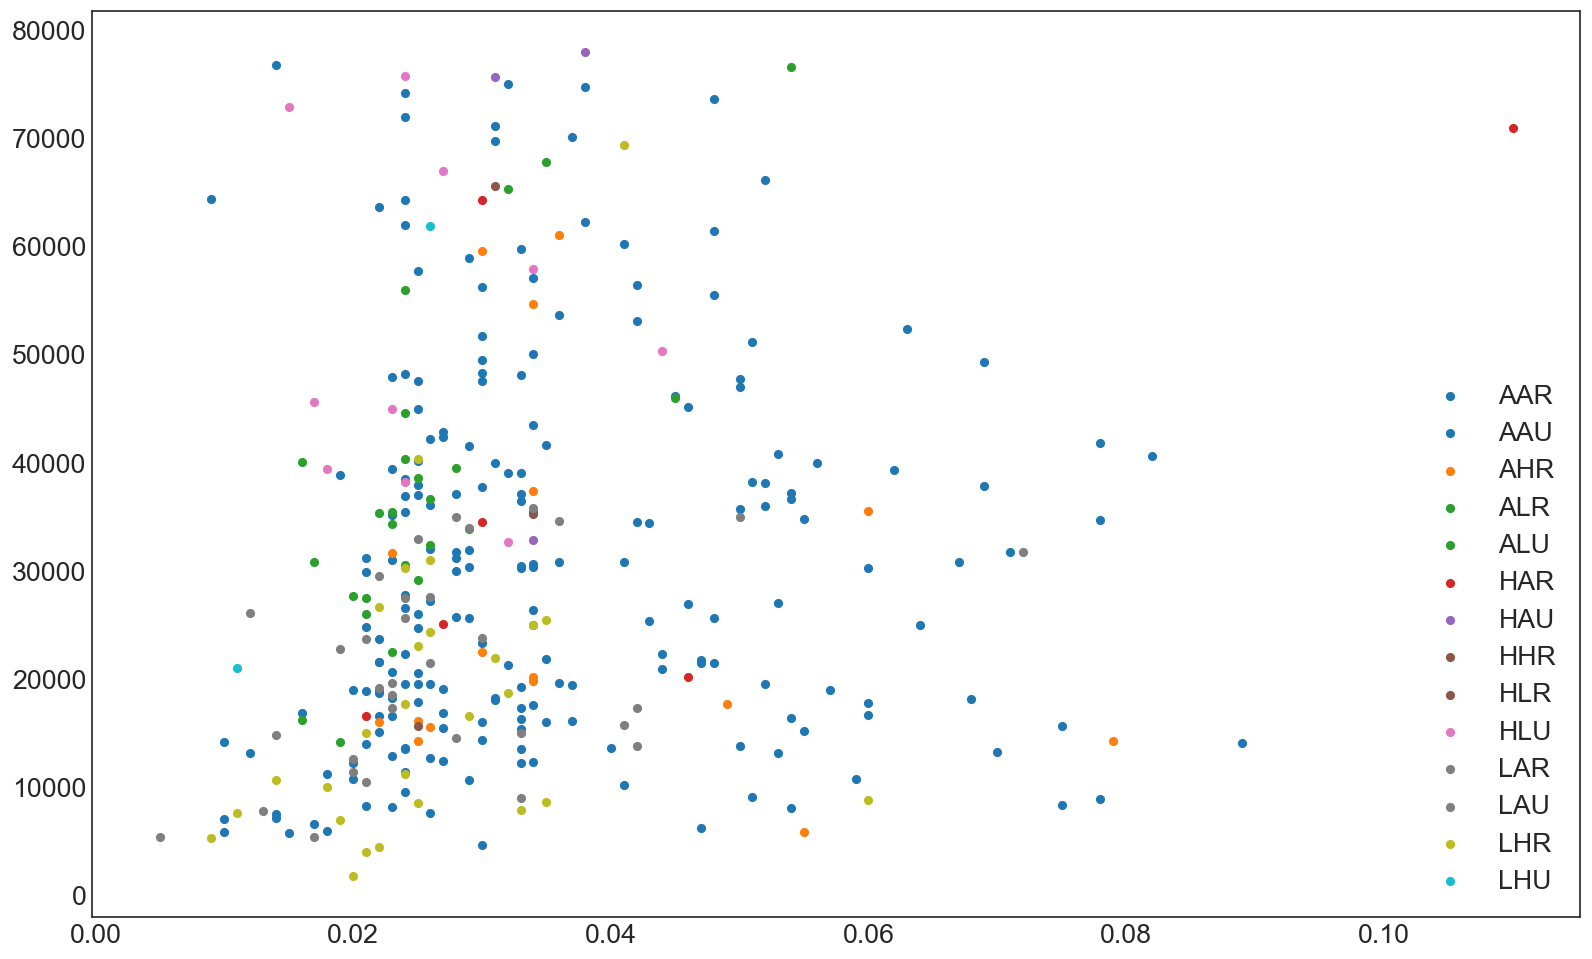

In [50]:
# 为了标签的名称，我们本来就需要循环和标签的类别数目一样的次数
# 所以需要循环的次数 = 需要生成的颜色的次数 = 需要生成的小数的个数
# 只需要在循环中不断生成颜色就好了
plt.figure(
            figsize=(16,10)     #绘图尺寸
            ,dpi=120            #图像分辨率
            ,facecolor='w'      #图像的背景颜色，设置为白色，默认也是白色
            ,edgecolor='w'      #图像的边框颜色，设置为白色，就能去掉坐标轴
)

for i in range(len(categories)):
    plt.scatter(midwest.loc[midwest['category'] == categories[i], 'area']
                ,midwest.loc[midwest['category'] == categories[i], 'poptotal']
                ,s=20
                ,c=np.array(plt.cm.tab10(i/len(categories))).reshape(1,-1)
                ,label = categories[i]
                )

plt.legend()
plt.show()


### 6.丰富图像（原博客代码分析）

设置图像属性，在notebook关闭之前都有效，关闭后无效，需要在每个notebook开始处进行设置

In [6]:
# 设置各种属性
large = 22
med = 16
small = 12

params = {'axes.titlesize': large, #子图上的标题字体大小
          'legend.fontsize': med, #图例的字体大小
          'figure.figsize': (16, 10), #图像的画布大小
          'axes.labelsize': med, #标签的字体大小
          'xtick.labelsize': med, #x轴上的标尺的字体大小
          'ytick.labelsize': med, #y轴上的标尺的字体大小
          'figure.titlesize': large} #整个画布的标题字体大小
plt.rcParams.update(params) #设定各种各样的默认属性
plt.style.use('seaborn-whitegrid') #设定整体风格
sns.set_style("white") #设定整体背景风格

%matplotlib inline

In [7]:
# 准备标签列表和颜色标签
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories) - 1)) for i in range(len(categories))]

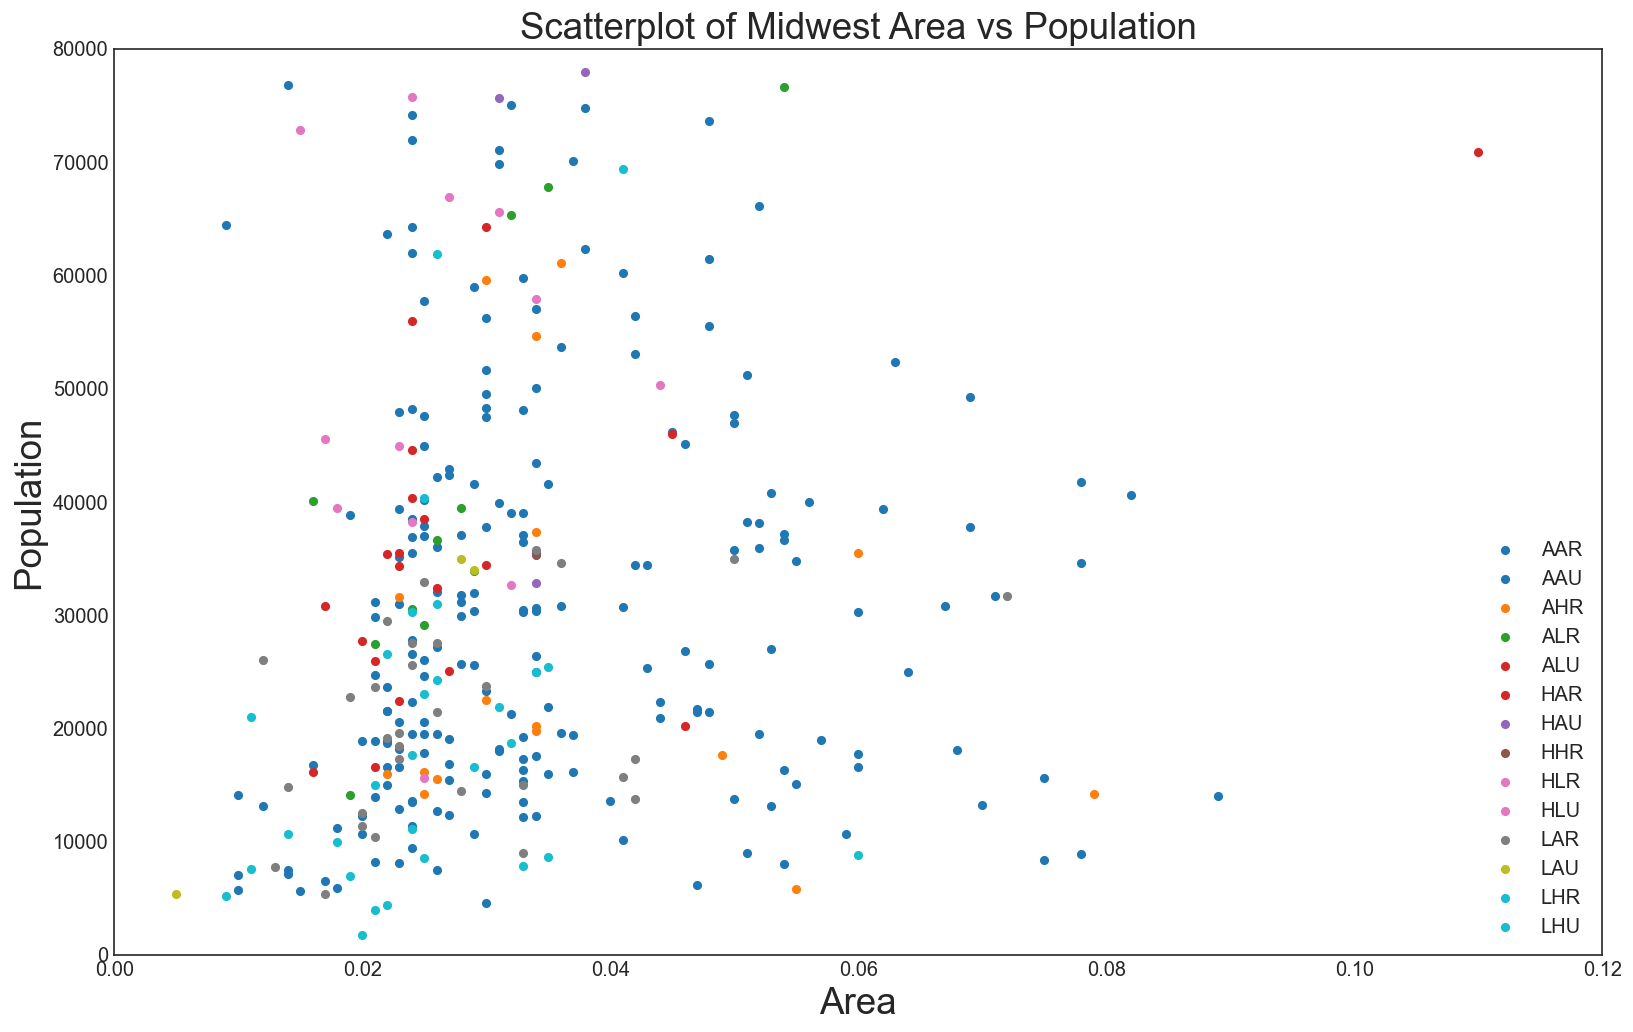

In [49]:
# 建立画布,这里对画布进行设置会改变预设值的内容
plt.figure(
            figsize=(16,10)     #绘图尺寸
            ,dpi=120            #图像分辨率
            ,facecolor='w'      #图像的背景颜色，设置为白色，默认也是白色
            ,edgecolor='k'      #图像的边框颜色，设置为黑色，默认也是黑色
)

# 循环画图
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal'      # 这里采用传入横纵坐标的名字，然后指定data来传入所有数据
                ,data = midwest.loc[midwest.category == category, :]
                ,s = 20
                ,c = np.array(colors[i]).reshape(1,-1)
                ,label = str(category)
                )

# 对图像进行装饰
# plt.gca() 获取当前子图，没有当前子图则创建一个
plt.gca().set(xlim = (0,0.12), ylim = (0, 80000))   # 控制坐标轴范围
plt.xticks(fontsize=12) # 坐标轴上字体大小
plt.yticks(fontsize=12)
plt.ylabel('Population', fontsize=22)
plt.xlabel('Area', fontsize=22)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12,loc='best')
plt.show()

#### 7. 用逻辑回归探索类型是什么

#### 数据预处理

In [8]:
# 分出来category
midwest['c1'] = midwest['category'].apply(lambda x: x[0])
midwest['c2'] = midwest['category'].apply(lambda x: x[1])
midwest['c3'] = midwest['category'].apply(lambda x: x[2])

In [7]:
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size,c1,c2,c3
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411,A,A,R
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260,L,H,R
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385,A,A,R
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487,A,L,U
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161,A,A,R


In [9]:
from sklearn.preprocessing import OrdinalEncoder as OE
data = midwest.copy()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PID                   332 non-null    int64  
 1   county                332 non-null    object 
 2   state                 332 non-null    object 
 3   area                  332 non-null    float64
 4   poptotal              332 non-null    int64  
 5   popdensity            332 non-null    float64
 6   popwhite              332 non-null    int64  
 7   popblack              332 non-null    int64  
 8   popamerindian         332 non-null    int64  
 9   popasian              332 non-null    int64  
 10  popother              332 non-null    int64  
 11  percwhite             332 non-null    float64
 12  percblack             332 non-null    float64
 13  percamerindan         332 non-null    float64
 14  percasian             332 non-null    float64
 15  percother             3

In [10]:
# 换成中文名
data.columns = ["城市ID","郡","州","面积","总人口","人口密度","白人人口","非裔人口","美洲印第安人人口","亚洲人口","其他人种人口"
                   ,"白人所占比例","非裔所占比例","美洲印第安人所占比例","亚洲人所占比例","其他人种比例"
                   ,"成年人口","具有高中文凭的比率","大学文凭比例","有工作的人群比例"
                   ,"已知贫困人口","已知贫困人口的比例","贫困线以下的人的比例","贫困线以下的儿童所占比例","贫困的成年人所占的比例","贫困的老年人所占的比例"
                   ,"是否拥有地铁","标签","点的尺寸","c1","c2","c3"]


In [11]:
# 去掉对象类型的列
data = data.loc[:,data.dtypes.values != 'O']

In [12]:
# 将int类型转成float类型
data.loc[:,data.dtypes.values == 'int64'] = data.loc[:,data.dtypes.values == 'int64']*1.0

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   城市ID          332 non-null    float64
 1   面积            332 non-null    float64
 2   总人口           332 non-null    float64
 3   人口密度          332 non-null    float64
 4   白人人口          332 non-null    float64
 5   非裔人口          332 non-null    float64
 6   美洲印第安人人口      332 non-null    float64
 7   亚洲人口          332 non-null    float64
 8   其他人种人口        332 non-null    float64
 9   白人所占比例        332 non-null    float64
 10  非裔所占比例        332 non-null    float64
 11  美洲印第安人所占比例    332 non-null    float64
 12  亚洲人所占比例       332 non-null    float64
 13  其他人种比例        332 non-null    float64
 14  成年人口          332 non-null    float64
 15  具有高中文凭的比率     332 non-null    float64
 16  大学文凭比例        332 non-null    float64
 17  有工作的人群比例      332 non-null    float64
 18  已知贫困人口        332 non-null    

In [14]:
# 城市id也没用，可以去掉
X = data.iloc[:, 1:]

In [15]:
X.head()

,面积,总人口,人口密度,白人人口,非裔人口,美洲印第安人人口,亚洲人口,其他人种人口,白人所占比例,非裔所占比例,...,大学文凭比例,有工作的人群比例,已知贫困人口,已知贫困人口的比例,贫困线以下的人的比例,贫困线以下的儿童所占比例,贫困的成年人所占的比例,贫困的老年人所占的比例,是否拥有地铁,点的尺寸
0,0.052,66090.0,1270.961540,63917.0,1702.0,98.0,249.0,124.0,96.712059,2.575276,...,19.631392,4.355859,63628.0,96.274777,13.151443,18.011717,11.009776,12.443812,0.0,250.944411
1,0.014,10626.0,759.000000,7054.0,3496.0,19.0,48.0,9.0,66.384340,32.900433,...,11.243308,2.870315,10529.0,99.087145,32.244278,45.826514,27.385647,25.228976,0.0,185.781260
2,0.022,14991.0,681.409091,14477.0,429.0,35.0,16.0,34.0,96.571276,2.861717,...,17.033819,4.488572,14235.0,94.956974,12.068844,14.036061,10.852090,12.697410,0.0,175.905385
3,0.017,30806.0,1812.117650,29344.0,127.0,46.0,150.0,1139.0,95.254171,0.412257,...,17.278954,4.197800,30337.0,98.477569,7.209019,11.179536,5.536013,6.217047,1.0,319.823487
4,0.018,5836.0,324.222222,5264.0,547.0,14.0,5.0,6.0,90.198766,9.372858,...,14.475999,3.367680,4815.0,82.505140,13.520249,13.022889,11.143211,19.200000,0.0,130.442161


In [16]:
y = midwest.iloc[:, -3:]
y.head()

,c1,c2,c3
0,A,A,R
1,L,H,R
2,A,A,R
3,A,L,U
4,A,A,R


In [17]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split as TTS
Xtrain, Xtest, Ytrain, Ytest = TTS(X, y, test_size=0.3, random_state=420)

In [18]:
Xtrain.head()

,面积,总人口,人口密度,白人人口,非裔人口,美洲印第安人人口,亚洲人口,其他人种人口,白人所占比例,非裔所占比例,...,大学文凭比例,有工作的人群比例,已知贫困人口,已知贫困人口的比例,贫困线以下的人的比例,贫困线以下的儿童所占比例,贫困的成年人所占的比例,贫困的老年人所占的比例,是否拥有地铁,点的尺寸
276,0.041,15682.0,382.487805,15001.0,375.0,125.0,56.0,125.0,95.657442,2.391277,...,12.427492,2.390578,14534.0,92.679505,14.435118,22.300831,13.310056,10.186757,0.0,137.858283
156,0.030,23265.0,775.500000,23127.0,2.0,50.0,41.0,45.0,99.406834,0.008597,...,16.583835,5.166100,22974.0,98.749194,7.704361,8.136567,6.168723,11.040340,0.0,187.881402
35,0.036,61067.0,1696.305560,51991.0,6342.0,109.0,2178.0,447.0,85.137636,10.385314,...,36.643665,14.089892,54230.0,88.804100,28.371750,26.392211,32.458483,13.815301,0.0,305.082769
161,0.031,18185.0,586.612903,17895.0,23.0,211.0,24.0,32.0,98.405279,0.126478,...,19.039803,5.014362,17942.0,98.663734,13.214803,18.758142,12.037542,9.681284,0.0,163.839599
321,0.079,14181.0,179.506329,11962.0,18.0,2167.0,15.0,19.0,84.352302,0.126930,...,17.947917,4.041667,13897.0,97.997320,20.544002,29.073570,19.195368,14.179318,0.0,112.022528


In [19]:
# 恢复索引
Xtrain.reset_index(inplace=True)

In [20]:
Xtest.reset_index(inplace=True)
Ytrain.reset_index(inplace=True)
Ytest.reset_index(inplace=True)

In [21]:
# 标准化数据集，标准化前去掉“是否拥有地跌”
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(Xtrain.iloc[:,[*range(23), -1]])  # 以训练集为标准的均值和方差

In [22]:
Xtrain_ = Xtrain.copy()
Xtest_ = Xtest.copy()

In [23]:
Xtrain_.iloc[:,[*range(23), -1]] = ss.transform(Xtrain.iloc[:,[*range(23), -1]])
Xtest_.iloc[:,[*range(23), -1]] = ss.transform(Xtest.iloc[:,[*range(23), -1]])

In [24]:
Xtrain_ = Xtrain_.iloc[:,1:]

In [25]:
Xtrain_.head()

,面积,总人口,人口密度,白人人口,非裔人口,美洲印第安人人口,亚洲人口,其他人种人口,白人所占比例,非裔所占比例,...,大学文凭比例,有工作的人群比例,已知贫困人口,已知贫困人口的比例,贫困线以下的人的比例,贫困线以下的儿童所占比例,贫困的成年人所占的比例,贫困的老年人所占的比例,是否拥有地铁,点的尺寸
0,0.616975,-0.781589,-0.817515,-0.806262,-0.109249,-0.024001,-0.298458,-0.020924,-0.560519,0.359059,...,-0.879865,-0.848804,-0.824188,-1.455058,0.342460,0.839258,0.428156,10.186757,0.0,-0.817515
1,-0.141464,-0.374282,-0.347133,-0.350269,-0.486592,-0.330845,-0.368263,-0.341073,0.588691,-0.457448,...,-0.002157,0.773189,-0.351151,0.550676,-1.033914,-1.207832,-0.982892,11.040340,0.0,-0.347133
2,0.272230,1.656180,0.754945,1.269442,5.927225,-0.089461,9.576664,1.267678,-3.784901,3.098491,...,4.233941,5.988182,1.400655,-2.735690,3.192365,1.430564,4.211672,13.815301,0.0,0.754945
3,-0.072515,-0.647145,-0.573205,-0.643865,-0.465347,0.327847,-0.447376,-0.393097,0.281709,-0.417052,...,0.516478,0.684514,-0.633180,0.522436,0.092918,0.327251,0.176721,9.681284,0.0,-0.573205
4,3.237036,-0.862212,-1.060456,-0.976797,-0.470405,8.330347,-0.489259,-0.445122,-4.025610,-0.416897,...,0.285901,0.116079,-0.859890,0.302219,1.591667,1.818087,1.591028,14.179318,0.0,-1.060456


In [28]:
Xtest_.head()

,面积,总人口,人口密度,白人人口,非裔人口,美洲印第安人人口,亚洲人口,其他人种人口,白人所占比例,非裔所占比例,...,大学文凭比例,有工作的人群比例,已知贫困人口,已知贫困人口的比例,贫困线以下的人的比例,贫困线以下的儿童所占比例,贫困的成年人所占的比例,贫困的老年人所占的比例,是否拥有地铁,点的尺寸
0,2.616496,-0.916248,-1.050034,-0.916978,-0.484568,-0.118100,-0.410146,-0.485140,0.428516,-0.449990,...,-0.239992,-0.327103,-0.916553,0.239146,0.891360,0.987149,0.654614,16.512236,0.0,-1.050034
1,-0.762005,-1.414974,-1.053596,-1.624704,-0.488615,13.657164,-0.559064,-0.501148,-26.602282,-0.460394,...,-1.955029,-1.941785,-1.424676,0.369364,7.347473,6.910410,6.356297,18.218623,0.0,-1.053596
2,-0.693056,1.795296,2.187823,1.818418,0.528086,-0.138556,2.279684,0.163162,-0.136157,0.080627,...,1.320417,1.753797,1.880081,0.510822,-0.861977,-0.832025,-0.820138,10.811943,0.0,2.187823
3,1.582261,-1.314369,-1.149891,-1.344015,-0.486592,0.818798,-0.531142,-0.497146,-1.064386,-0.448501,...,-0.462127,-0.298376,-1.326818,-0.165594,1.005754,0.932132,1.132860,12.835093,0.0,-1.149891
4,-0.141464,1.828384,1.288899,1.888281,-0.226599,1.735240,0.920808,-0.032929,0.172491,-0.322303,...,3.036940,1.859724,1.885013,0.243701,-0.861170,-0.764387,-0.720235,7.691539,0.0,1.288899


In [27]:
Xtest_ = Xtest_.iloc[:,1:]

In [32]:
Ytrain.iloc[:,1].ravel()

array(['L', 'A', 'A', 'A', 'A', 'A', 'A', 'L', 'A', 'A', 'A', 'H', 'A',
       'A', 'A', 'A', 'L', 'L', 'A', 'L', 'A', 'A', 'A', 'A', 'A', 'L',
       'L', 'A', 'A', 'L', 'A', 'A', 'A', 'L', 'A', 'A', 'A', 'A', 'A',
       'L', 'L', 'A', 'A', 'A', 'L', 'A', 'A', 'L', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'L', 'A', 'L', 'A', 'L', 'A', 'A', 'L',
       'A', 'A', 'A', 'L', 'L', 'A', 'A', 'A', 'H', 'A', 'A', 'A', 'A',
       'A', 'L', 'A', 'A', 'A', 'A', 'H', 'L', 'A', 'A', 'A', 'L', 'A',
       'A', 'A', 'A', 'L', 'A', 'A', 'A', 'H', 'A', 'A', 'A', 'A', 'L',
       'L', 'A', 'A', 'L', 'A', 'L', 'A', 'A', 'A', 'A', 'L', 'A', 'A',
       'A', 'H', 'A', 'A', 'A', 'A', 'A', 'A', 'L', 'L', 'A', 'A', 'H',
       'A', 'A', 'H', 'A', 'A', 'H', 'H', 'A', 'L', 'A', 'A', 'A', 'L',
       'L', 'A', 'A', 'A', 'A', 'A', 'H', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'L', 'A', 'L', 'L', 'A', 'H', 'A', 'A', 'A',
       'A', 'L', 'A', 'L', 'A', 'A', 'A', 'A', 'L', 'A', 'A', 'H

In [37]:
Ytrain.head()

,c1,c2,c3
0,L,A,R
1,A,A,R
2,A,H,R
3,A,A,R
4,A,H,R


In [36]:
Ytrain = Ytrain.iloc[:,1:]
Ytest = Ytest.iloc[:,1:]

In [43]:
Xtrain = Xtrain.iloc[:,1:]

In [44]:
Xtrain.head()

,面积,总人口,人口密度,白人人口,非裔人口,美洲印第安人人口,亚洲人口,其他人种人口,白人所占比例,非裔所占比例,...,大学文凭比例,有工作的人群比例,已知贫困人口,已知贫困人口的比例,贫困线以下的人的比例,贫困线以下的儿童所占比例,贫困的成年人所占的比例,贫困的老年人所占的比例,是否拥有地铁,点的尺寸
0,0.041,15682.0,382.487805,15001.0,375.0,125.0,56.0,125.0,95.657442,2.391277,...,12.427492,2.390578,14534.0,92.679505,14.435118,22.300831,13.310056,10.186757,0.0,137.858283
1,0.030,23265.0,775.500000,23127.0,2.0,50.0,41.0,45.0,99.406834,0.008597,...,16.583835,5.166100,22974.0,98.749194,7.704361,8.136567,6.168723,11.040340,0.0,187.881402
2,0.036,61067.0,1696.305560,51991.0,6342.0,109.0,2178.0,447.0,85.137636,10.385314,...,36.643665,14.089892,54230.0,88.804100,28.371750,26.392211,32.458483,13.815301,0.0,305.082769
3,0.031,18185.0,586.612903,17895.0,23.0,211.0,24.0,32.0,98.405279,0.126478,...,19.039803,5.014362,17942.0,98.663734,13.214803,18.758142,12.037542,9.681284,0.0,163.839599
4,0.079,14181.0,179.506329,11962.0,18.0,2167.0,15.0,19.0,84.352302,0.126930,...,17.947917,4.041667,13897.0,97.997320,20.544002,29.073570,19.195368,14.179318,0.0,112.022528


In [45]:
# 使用逻辑回归探索数据集
from sklearn.linear_model import LogisticRegression as logiR

for i in range(3): # 三次建模，对应c1 c2 c3
    logi = logiR(solver="newton-cg", max_iter=100**20, multi_class="multinomial").fit(Xtrain_, Ytrain.iloc[:,i].ravel())
    print(y.columns[i])
    print("\tTrain:{}".format(logi.score(Xtrain_, Ytrain.iloc[:,i].ravel()))) # 模型的学习能力
    print("\tTest:{}".format(logi.score(Xtest_, Ytest.iloc[:,i].ravel())))    # 模型的泛化能力
    coeff = pd.DataFrame(logi.coef_).T 
    if i !=2 :
        coeff['mean'] = abs(coeff).mean(axis=1)
        coeff['name'] = Xtrain.columns
        coeff.columns = ['Average', 'High', 'Low', 'mean','name']
        coeff = coeff.sort_values(by='mean', ascending=False).head()
    else:
        coeff['name'] = Xtrain.columns
        coeff.columns = ['Coef', 'name']
        coeff = coeff.sort_values(by='Coef', ascending=False).head()
    print(coeff)
    print('\t')

c1
	Train:0.9956896551724138
	Test:0.97
     Average      High       Low      mean         name
14  1.270841  2.190459 -3.461301  2.307534    具有高中文凭的比率
15 -0.651762  1.379946 -0.728184  0.919964       大学文凭比例
16 -0.364258  0.898980 -0.534722  0.599320     有工作的人群比例
21  0.173957 -0.646609  0.472652  0.431073  贫困的成年人所占的比例
23 -0.526989  0.343680  0.183310  0.351326       是否拥有地铁
	
c2
	Train:0.9827586206896551
	Test:0.98
     Average      High       Low      mean          name
20  0.213172  1.735800 -1.948972  1.299315  贫困线以下的儿童所占比例
21 -0.296637  1.747433 -1.450796  1.164955   贫困的成年人所占的比例
19  0.083393  1.564370 -1.647763  1.098509    贫困线以下的人的比例
12 -0.533872  0.273615  0.260256  0.355914        其他人种比例
23 -0.452561 -0.067895  0.520456  0.346971        是否拥有地铁
	
c3
	Train:1.0
	Test:1.0
        Coef    name
23  2.981828  是否拥有地铁
3   0.103905    白人人口
17  0.103751  已知贫困人口
1   0.095630     总人口
8   0.072366  白人所占比例
	


结论：<br>
第一个字母是平均教育程度的高低(越高的话，我们的标签就是H)<br>
第二个字母是贫困水平的高低（越穷的话，我们的水平就是H）<br>
第三个字母是城市还是乡村

### 8. 圈出来想看的点

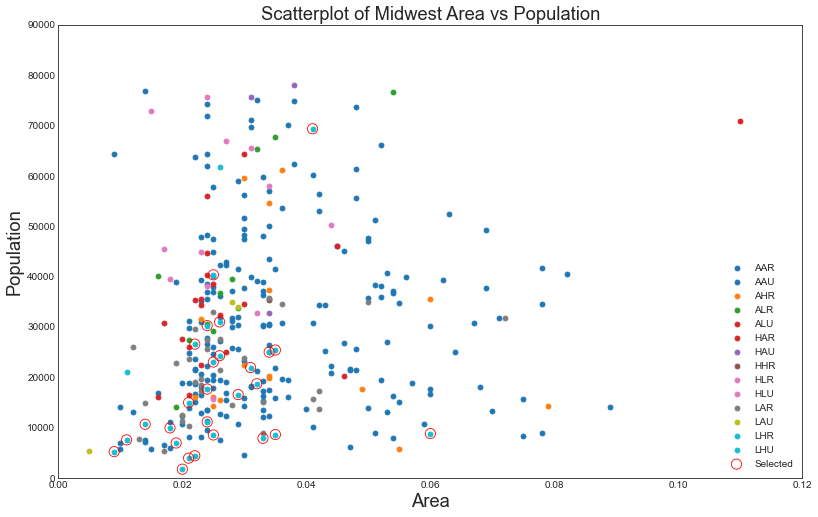

In [49]:
plt.figure(
    figsize=(16,10)
    ,dpi=60
    ,facecolor='w'
    ,edgecolor='k'
)
# 循环画图
for i, category in enumerate(categories):
    plt.scatter(
        'area', 'poptotal'
        ,data=midwest.loc[midwest.category == category, :]
        ,c = np.array(plt.cm.tab10(i/float(len(categories) - 1))).reshape(1,-1)
        ,label=str(category)
        )

# 圈出来想要看的点
plt.scatter(
    'area','poptotal'
    ,data = midwest.loc[midwest.category == "LHR", :]
    ,s = 150
    ,facecolors = 'None'
    ,edgecolors='red'
    ,label = 'Selected'
)

plt.gca().set(xlim=(0.0, 0.12), ylim=(0, 90000))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Population', fontsize=22)
plt.xlabel('Area', fontsize=22)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)
plt.show()
